## Classification Bake-off:

The goal of this bake off if for students to practice the data science process and handling . Through this process, you will need to clean and prepare the data, engineer features, fit didfferent models, tune the hyperparameters of those models, and account for how any class imbalance can affect your model. 

## Data Set Information:

This dataset contains information about customers' credit card default payments in Taiwan. It was taken from a study that compares the predictive accuracy of probability of default among six data mining methods. This data set is not as clean as some of the data you have previously recieved. Below is all of the information that is given about the different columns of data. As you explore this data you will find that the 'data dictionary' below does not include all of the values that you will find in the actual dataset. You will have to make decisions on your own as to how you will interpret and handle these unknown values.  

## Evaluation:

For this bake-off, we will be scoring the submitted predictions using the F1 score. 


## Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
    - X6 = the repayment status in September, 2005;
    - X7 = the repayment status in August, 2005; . . .;
    - X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar).
    - X18 = amount paid in September, 2005;
    - X19 = amount paid in August, 2005; . . .;
    - X23 = amount paid in April, 2005.

# Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv('dataset.csv', index_col='Unnamed: 0')
train_df.shape

(22500, 24)

In [3]:
hold_df = pd.read_csv('validation_set.csv', index_col='Unnamed: 0')
hold_df.shape

(7500, 23)

# Create Features

In [4]:
# Function to rename credit limit, default, payment status, balance and payment amount columns
def rename_cols(df):
    if 'default payment next month' in df.keys():
        df = df.rename(columns={'default payment next month': 'DEFAULT'})
    df = df.rename(columns={'LIMIT_BAL': 'CREDIT_LIM'})
    df = df.rename(columns={'PAY_0': 'SEP_STS', 'PAY_2': 'AUG_STS', 'PAY_3': 'JUL_STS',
                            'PAY_4': 'JUN_STS', 'PAY_5': 'MAY_STS', 'PAY_6': 'APR_STS'})
    df = df.rename(columns={'BILL_AMT1': 'SEP_BAL', 'BILL_AMT2': 'AUG_BAL', 'BILL_AMT3': 'JUL_BAL',
                            'BILL_AMT4': 'JUN_BAL', 'BILL_AMT5': 'MAY_BAL', 'BILL_AMT6': 'APR_BAL'})
    df = df.rename(columns={'PAY_AMT1': 'SEP_PMT', 'PAY_AMT2': 'AUG_PMT', 'PAY_AMT3': 'JUL_PMT',
                            'PAY_AMT4': 'JUN_PMT', 'PAY_AMT5': 'MAY_PMT', 'PAY_AMT6': 'APR_PMT'})
    return df

In [5]:
# Function to turn sex data into male dummy column
def dummies_sex(df):
    filt = df['SEX'] == 1
    df['SEX_M'] = np.where(filt, 1, 0)
    df.drop('SEX', axis=1, inplace=True)
    return df

In [6]:
# Function to turn education data into dummy columns
def dummies_edu(df):
    df['EDUCATION'] = df['EDUCATION'].map({1: 'GS', 2: 'UNI', 3: 'HS', 4: 'OTH',
                                           0: '0_UNK', 5: '5_UNK', 6: '6_UNK'})
    dummies = pd.get_dummies(df['EDUCATION'], prefix='EDU', drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    df.drop(['EDUCATION', 'EDU_0_UNK'], axis=1, inplace=True)
    return df

In [7]:
# Function to turn marital status data into dummy columns
def dummies_ms(df):
    df['MARRIAGE'] = df['MARRIAGE'].map({1: 'MAR', 2: 'SGL', 3: 'OTH', 0: '0_UNK'})
    dummies = pd.get_dummies(df['MARRIAGE'], prefix='MS', drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    df.drop(['MARRIAGE', 'MS_0_UNK'], axis=1, inplace=True)
    return df

In [8]:
# Function to turn payment status data into dummy columns
def dummies_sts(df):
    for m in ['SEP', 'AUG', 'JUL', 'JUN', 'MAY', 'APR']:
        df[f'{m}_PAID'] = np.where(df[f'{m}_STS'] == -1, 1, 0)
        df[f'{m}_DEL_1'] = np.where(df[f'{m}_STS'] == 1, 1, 0)
        df[f'{m}_DEL_2'] = np.where(df[f'{m}_STS'] == 2, 1, 0)
        df[f'{m}_DEL_2'] = np.where(df[f'{m}_STS'] == 3, 1, 0)
        df[f'{m}_DEL_3'] = np.where(df[f'{m}_STS'] == 4, 1, 0)
        df[f'{m}_DEL_4'] = np.where(df[f'{m}_STS'] == 5, 1, 0)
        df[f'{m}_DEL_5'] = np.where(df[f'{m}_STS'] == 6, 1, 0)
        df[f'{m}_DEL_6'] = np.where(df[f'{m}_STS'] == 7, 1, 0)
        df[f'{m}_DEL_7'] = np.where(df[f'{m}_STS'] == 8, 1, 0)
        df[f'{m}_DEL_8'] = np.where(df[f'{m}_STS'] == 9, 1, 0)
        df[f'{m}_0_UNK'] = np.where(df[f'{m}_STS'] == 0, 1, 0)
        df[f'{m}_-2_UNK'] = np.where(df[f'{m}_STS'] == -2, 1, 0)
        df.drop([f'{m}_STS', f'{m}_-2_UNK'], axis=1, inplace=True)
    return df

# Apply Features to Dataframes

In [9]:
# Function to apply all features to dataframes
def create_features(df):
    df = rename_cols(df)
    df = dummies_sex(df)
    df = dummies_edu(df)
    df = dummies_ms(df)
    df = dummies_sts(df)
    return df

# Apply features to dataframes
train_df = create_features(train_df)
hold_df = create_features(hold_df)

In [10]:
# Function to add 0 values for any missing columns in two dataframes
def compare_cols(df1, df2):
    for col in df1:
        if col in df2:
            pass
        else:
            df2[col] = 0
    for col in df2:
        if col in df1:
            pass
        else:
            df1[col] = 0
    return df1, df2

# Add 0 values for any missing columns, drop default column from holdout
train_df, hold_df = compare_cols(train_df, hold_df)
hold_df.drop('DEFAULT', axis=1, inplace=True)

In [11]:
train_df.keys()

Index(['CREDIT_LIM', 'AGE', 'SEP_BAL', 'AUG_BAL', 'JUL_BAL', 'JUN_BAL',
       'MAY_BAL', 'APR_BAL', 'SEP_PMT', 'AUG_PMT', 'JUL_PMT', 'JUN_PMT',
       'MAY_PMT', 'APR_PMT', 'DEFAULT', 'SEX_M', 'EDU_5_UNK', 'EDU_6_UNK',
       'EDU_GS', 'EDU_HS', 'EDU_OTH', 'EDU_UNI', 'MS_MAR', 'MS_OTH', 'MS_SGL',
       'SEP_PAID', 'SEP_DEL_1', 'SEP_DEL_2', 'SEP_DEL_3', 'SEP_DEL_4',
       'SEP_DEL_5', 'SEP_DEL_6', 'SEP_DEL_7', 'SEP_DEL_8', 'SEP_0_UNK',
       'AUG_PAID', 'AUG_DEL_1', 'AUG_DEL_2', 'AUG_DEL_3', 'AUG_DEL_4',
       'AUG_DEL_5', 'AUG_DEL_6', 'AUG_DEL_7', 'AUG_DEL_8', 'AUG_0_UNK',
       'JUL_PAID', 'JUL_DEL_1', 'JUL_DEL_2', 'JUL_DEL_3', 'JUL_DEL_4',
       'JUL_DEL_5', 'JUL_DEL_6', 'JUL_DEL_7', 'JUL_DEL_8', 'JUL_0_UNK',
       'JUN_PAID', 'JUN_DEL_1', 'JUN_DEL_2', 'JUN_DEL_3', 'JUN_DEL_4',
       'JUN_DEL_5', 'JUN_DEL_6', 'JUN_DEL_7', 'JUN_DEL_8', 'JUN_0_UNK',
       'MAY_PAID', 'MAY_DEL_1', 'MAY_DEL_2', 'MAY_DEL_3', 'MAY_DEL_4',
       'MAY_DEL_5', 'MAY_DEL_6', 'MAY_DEL_7', 'MAY_DEL_8',

In [12]:
hold_df.keys()

Index(['CREDIT_LIM', 'AGE', 'SEP_BAL', 'AUG_BAL', 'JUL_BAL', 'JUN_BAL',
       'MAY_BAL', 'APR_BAL', 'SEP_PMT', 'AUG_PMT', 'JUL_PMT', 'JUN_PMT',
       'MAY_PMT', 'APR_PMT', 'SEX_M', 'EDU_5_UNK', 'EDU_6_UNK', 'EDU_GS',
       'EDU_HS', 'EDU_OTH', 'EDU_UNI', 'MS_MAR', 'MS_OTH', 'MS_SGL',
       'SEP_PAID', 'SEP_DEL_1', 'SEP_DEL_2', 'SEP_DEL_3', 'SEP_DEL_4',
       'SEP_DEL_5', 'SEP_DEL_6', 'SEP_DEL_7', 'SEP_DEL_8', 'SEP_0_UNK',
       'AUG_PAID', 'AUG_DEL_1', 'AUG_DEL_2', 'AUG_DEL_3', 'AUG_DEL_4',
       'AUG_DEL_5', 'AUG_DEL_6', 'AUG_DEL_7', 'AUG_DEL_8', 'AUG_0_UNK',
       'JUL_PAID', 'JUL_DEL_1', 'JUL_DEL_2', 'JUL_DEL_3', 'JUL_DEL_4',
       'JUL_DEL_5', 'JUL_DEL_6', 'JUL_DEL_7', 'JUL_DEL_8', 'JUL_0_UNK',
       'JUN_PAID', 'JUN_DEL_1', 'JUN_DEL_2', 'JUN_DEL_3', 'JUN_DEL_4',
       'JUN_DEL_5', 'JUN_DEL_6', 'JUN_DEL_7', 'JUN_DEL_8', 'JUN_0_UNK',
       'MAY_PAID', 'MAY_DEL_1', 'MAY_DEL_2', 'MAY_DEL_3', 'MAY_DEL_4',
       'MAY_DEL_5', 'MAY_DEL_6', 'MAY_DEL_7', 'MAY_DEL_8', 'MAY_0_UNK

# EDA

In [13]:
# Percentage of borrowers who defaulted
dft_pct = len(train_df[train_df['DEFAULT'] == 1])/len(train_df)
dft_pct

0.2212

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


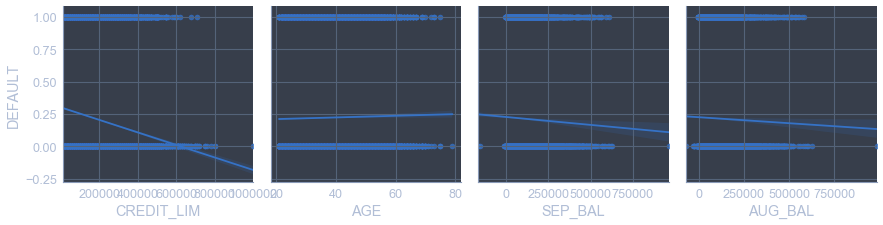

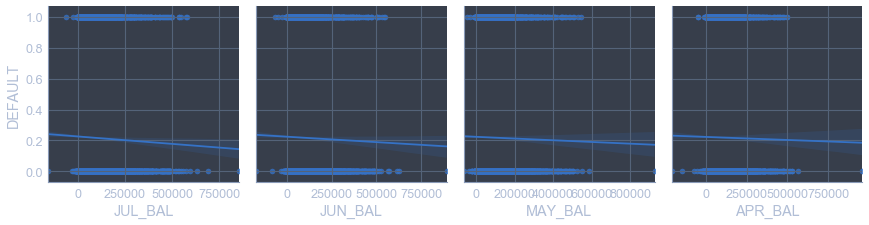

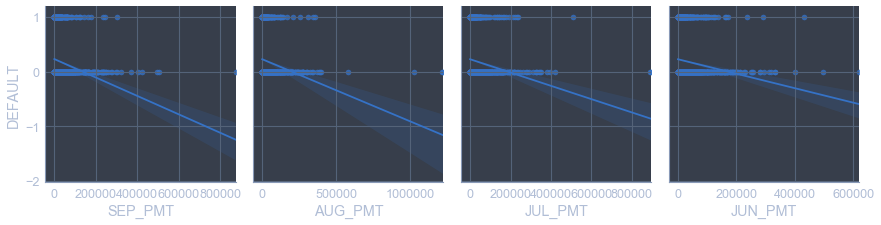

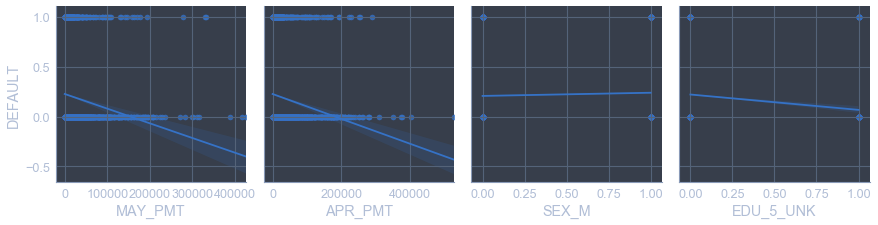

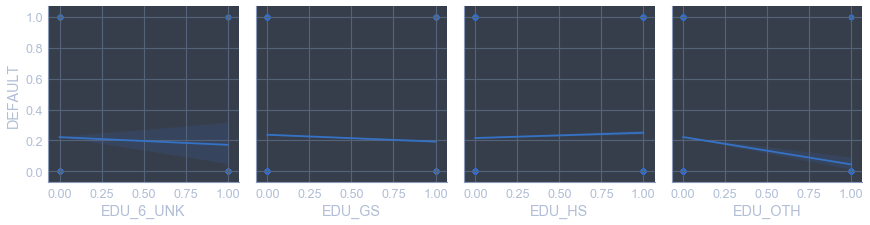

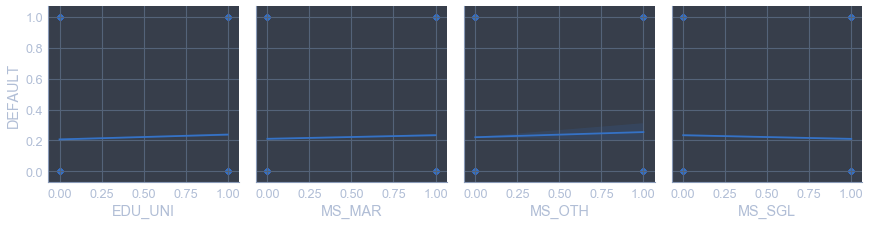

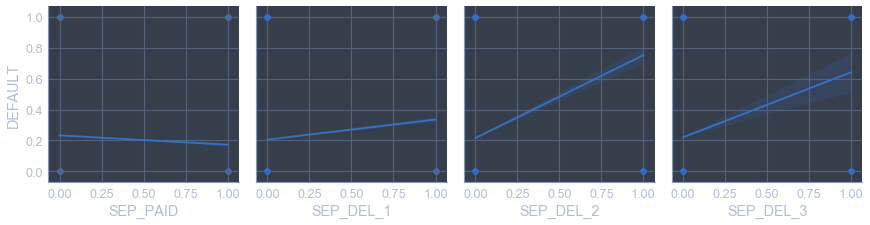

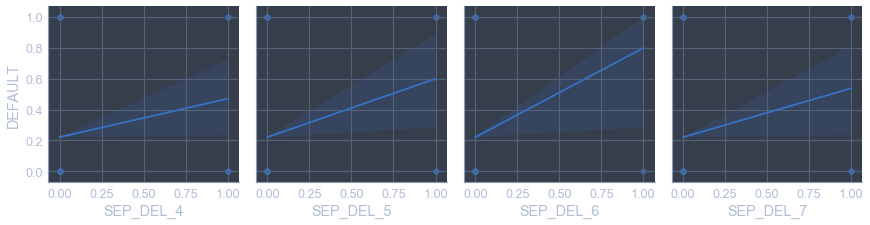

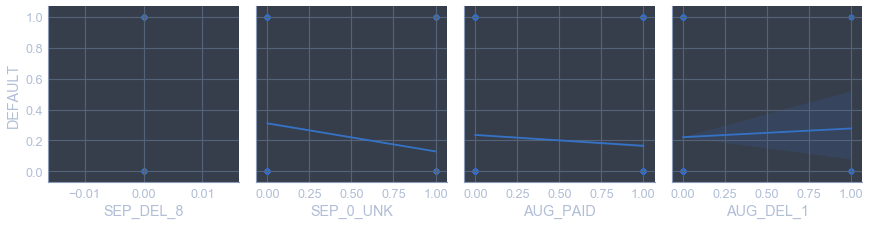

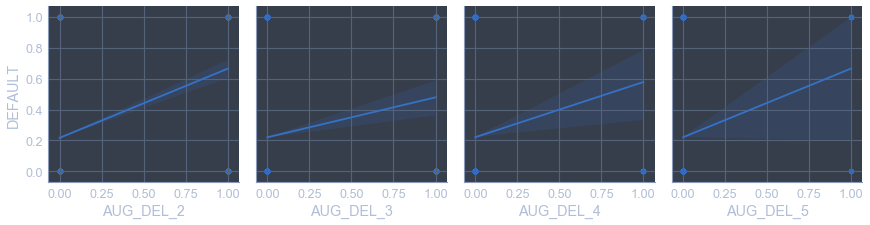

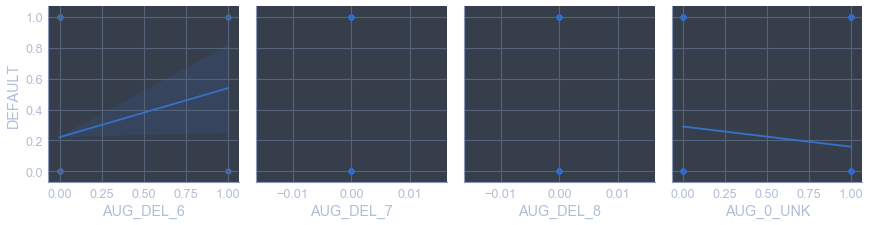

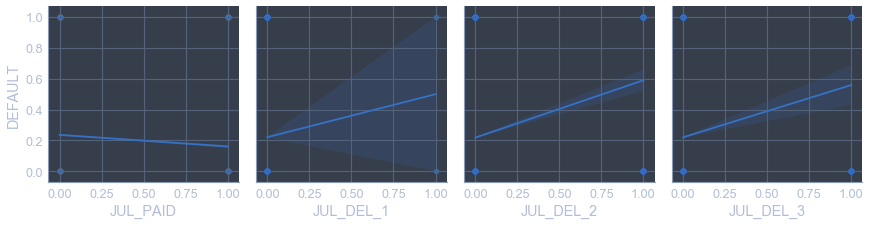

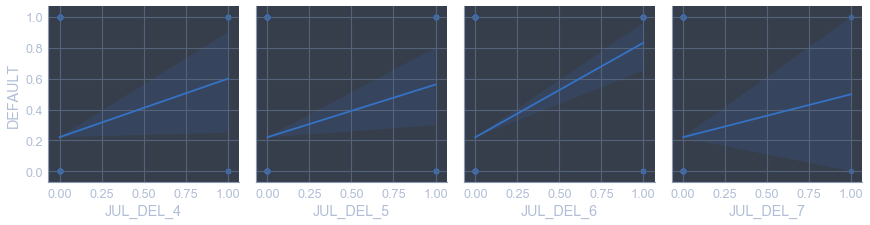

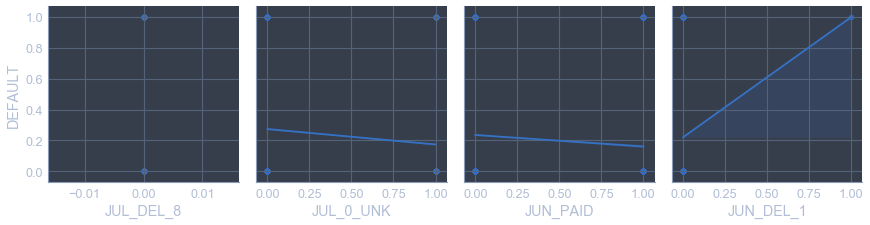

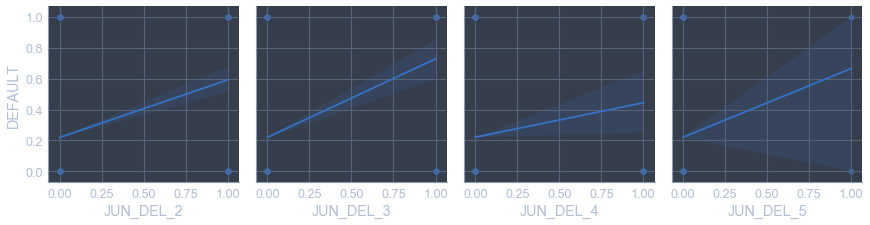

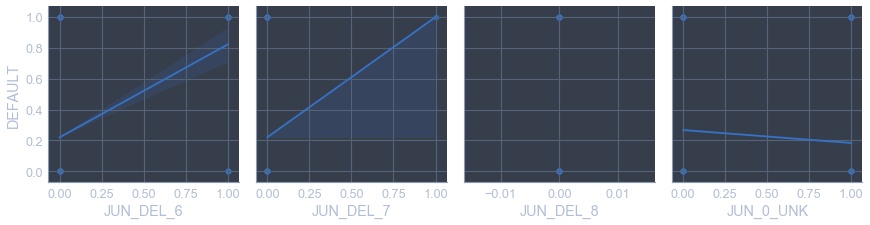

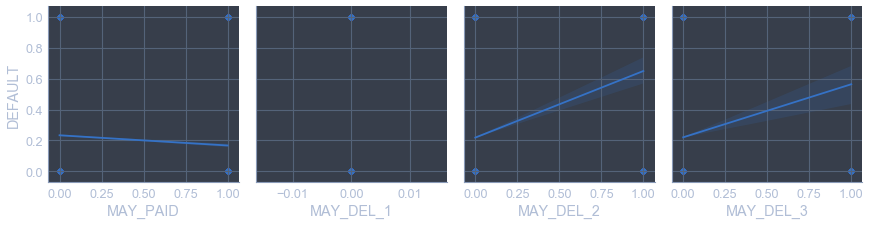

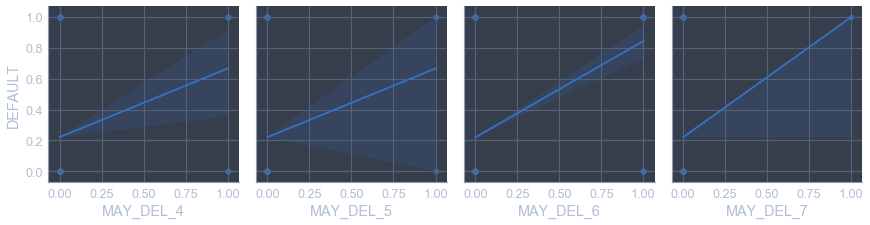

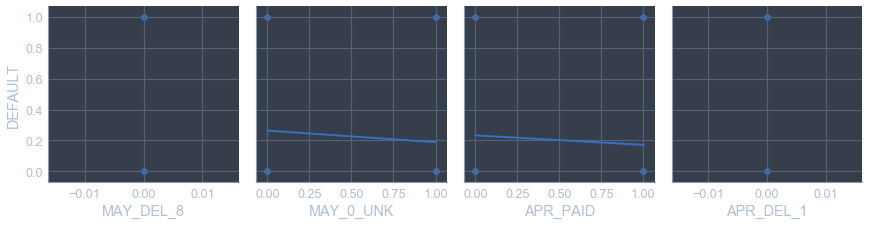

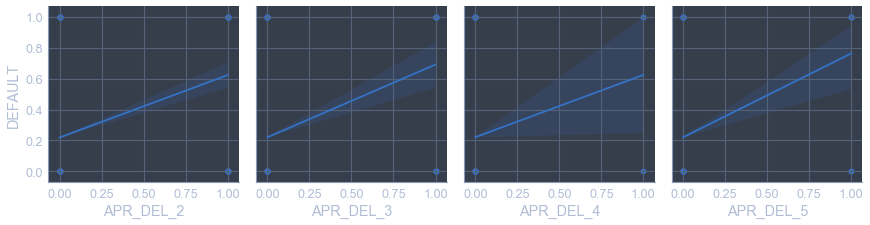

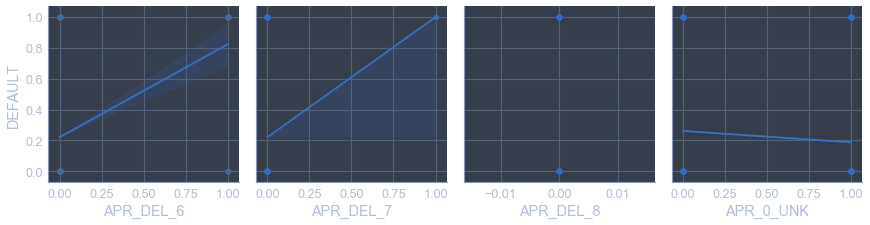

In [14]:
# Function to create feature pplots
def pplot_features(df, features):
    pp_rows = [features[i:i+4] for i in range(0, len(features), 4)]
    for row in pp_rows:
        pp = sns.pairplot(data=df, y_vars=['DEFAULT'], x_vars=row, kind='reg', height=3)
    return None

pplot_features(train_df, train_df.drop(columns='DEFAULT').keys())

# Testing